In [ ]:
## Compute the Efficient Frontier for a multiple-asset portfolio
import numpy as np
import pandas as pd
import itertools

def portfolio_return(weights, returns):
  portfolio_return = np.dot(weights, returns)
  return portfolio_return

def portfolio_risk(weights, cov_matrix):
  portfolio_risk = np.dot(weights.T, np.dot(cov_matrix,weights))
  return portfolio_risk

In [ ]:
## These helper functions generate different weight combinations for the n_assets

def generate_weight_combinations(n_assets, steps=1000):
    """Generate all possible combinations of weights for n_assets that sum to 1."""
    """Can be very slow as dimensionality rises"""
    step_size = 1.0 / steps
    weights = np.arange(0, 1.01, step_size)
    return [comb for comb in itertools.product(weights, repeat=n_assets) if sum(comb)==1.0]

def generate_random_weight_combinations(n_assets, num_combinations=1000):
    return np.random.dirichlet(np.ones(n_assets), num_combinations)

In [ ]:
## Enter the return vector and variance-covariance matrix
## Here, we are using the same inputs as the 2-asset case for testing purposes

r1 = 0.1
r2 = 0.17
s1 = 0.12
s2 = 0.25
rho = 0

## Remember, we are using Linear Algebra in the multi-asset case.
## Expected Returns is a vector and Risk is the variance-covariance matrix.

returns = np.array([portfolio_return(r1,r2),portfolio_return(s1,s2)])
# w1**2*s1**2+w2**2*s2**2+2*w1*w2*rho*s1*s2
cov_matrix = np.array([
        [s1**2,rho*s1*s2],
        [rho*s1*s2,s2**2]
    ])

In [ ]:
cols = ['Weights', 'Portfolio Return', 'Portfolio Risk']
lst = []

#weight_combinations = generate_random_weight_combinations(2)
weight_combinations = generate_weight_combinations(2)

for weights_tuple in weight_combinations:
    weights = np.array(weights_tuple)
    portret = portfolio_return(weights, returns)
    portvar = portfolio_risk(weights, cov_matrix)
    portstd = portvar**(1/2)
    lst.append([weights, portret, portstd])

df = pd.DataFrame(lst, columns=cols)
df

,Weights,Portfolio Return,Portfolio Risk
0,"[0.0, 1.0]",0.030000,0.250000
1,"[0.001, 0.999]",0.029987,0.249750
2,"[0.002, 0.998]",0.029974,0.249500
3,"[0.003, 0.997]",0.029961,0.249250
4,"[0.004, 0.996]",0.029948,0.249000
...,...,...,...
996,"[0.996, 0.004]",0.017052,0.119524
997,"[0.997, 0.003]",0.017039,0.119642
998,"[0.998, 0.002]",0.017026,0.119761
999,"[0.999, 0.001]",0.017013,0.119880


<Axes: xlabel='Portfolio Risk', ylabel='Portfolio Return'>

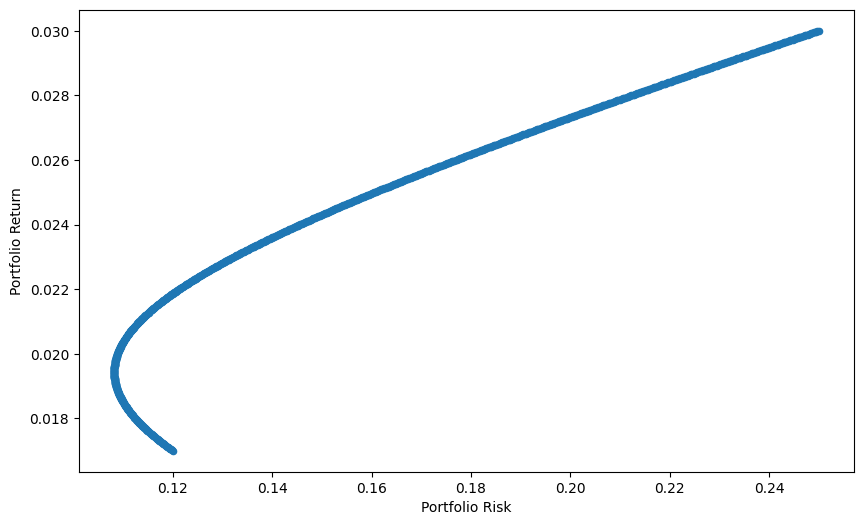

In [ ]:
df.plot.scatter(x='Portfolio Risk', y='Portfolio Return', figsize=(10,6))

In [ ]:
## Find the weights for the minimum variance portfolio
min_risk = df['Portfolio Risk'].min()
df.loc[df['Portfolio Risk'] == min_risk]

,Weights,Portfolio Return,Portfolio Risk
813,"[0.8130000000000001, 0.187]",0.019431,0.108183
